# Tutorial 5: Monte Carlo simulation of the 2D Ising model

## Physics 7810, Spring 2020

## T5.1 - Monte Carlo simulation of the 2D Ising model

The simplest and most extensively studied lattice model in statistical physics is the *Ising model*, which provides a minimal theoretical description of ferromagnetic and antiferromagnetic phases, binary alloys, and lattice gas models of liquid-vapor coexistence.

The Ising model consists of a lattice of $N$ sites $i$ with a single, two-state degree of freedom $s_i$ on each site that can take values $\pm 1$

The Hamiltonian (energy) of the Ising model is

$$
H = - J \sum_{\langle i j \rangle} s_i s_j - B \sum_i s_i,
$$

where the first sum is over all pairs $\langle ij \rangle$ of nearest-neighbor sites, $J$ is the *coupling* between these sites, and $B$ is the *applied field*.

The properties of the Ising model depend critically on the *spatial dimensionality* $d$, and less critically on the *lattice symmetry* (e.g., square vs. triangular), which determines the number of nearest neighbors (coordination number) $z$. There are exact solutions for the 1D and 2D Ising model, but only numerical solutions for the 3D Ising model. Positive coupling $J$ leads to *ferromagnetic* ordering at low temperatures, while negative $J$ favors an *antiferromagnetic* ground state.

Write a Monte Carlo program to simulate the 2D Ising model on a square lattice with periodic boundary conditions. Implement the single spin flip Metropolis algorithm for sampling, and assume that the external field $B$ is zero for now.

Measure and plot the average energy $\langle E/N \rangle$ and magnetization per spin $\langle M / N \rangle$, at several temperatures $T$. The total Ising model magnetization is $M = \sum_i s_i$.

Determine the critical temperature $T_c$ (the temperature where the magnetization goes to zero with increasing $T$. Hint: you should obtain $T_c \approx 2.27$

Pro tips:
* Save computation time by avoiding unnecessary reevaluation of the exponential function. To achieve this, use an array to store the possible probabilities for spin-flip acceptance.
* Organize your simulation in terms of Monte Carlo *sweeps*, where a sweep is defined as one attempted spin flip per site. You should pick spins for attempted flips at random, to ensure detailed balance.

### Solution

In this tutorial, we rely on the following methods to solve the problem.

In [4]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [18]:
class Ising_2D():
    def __init__(self):
        self.J = -1
        self.B = 0
        self.n = 5
        self.N_steps = 2000
    
    @property
    def config(self):  # Using @property: self.config will change whenever self.n changes
        return 2 * np.random.randint(2, size=(self.n, self.n)) - 1
        
    def compute_energy(self, config):
        H, N = 0, self.n
        for i in range(self.n):
            for j in range(self.n):
                sum_sj = config[(i + 1) % N, j] + config[i, (j + 1) % N] + config[(i - 1) % N, j] + config[i, (j - 1) % N]
                H += config[i, j] * sum_sj
                
        return H / 4
    
    def MC_metropolis(self, config, T):
        beta = 1 / T  # assume that kB = 1
        N = self.n
        h, m = [], [] # h = H/N and m = M/N  
        for i in range(self.N_steps):
            x, y = np.random.randint(0, N), np.random.randint(0, N)

            # note that H_new = -J (\sum (-si) * sj), H_old = -J (\sum si * sj)
            # so delta_H = 2J(\sum si * sj) and we don't have to calculate H_new and H_old
            si = config[x, y]
            sum_sj = config[(x + 1) % N, y] + config[x, (y + 1) % N] + config[(x - 1) % N, y] + config[x, (y - 1) % N]
            
            delta_H = 2 * self.J * si * sum_sj
            p_acc = np.exp(-beta * delta_H)
        
            if delta_H < 0:
                config[x, y] *= (-1)
            else:
                if np.random.rand() < p_acc:
                    config[x, y] *= (-1)
            h.append(self.compute_energy(config) / model.n ** 2)
            m.append(np.sum(config) / model.n ** 2)
        
        self.h_avg = np.mean(np.array(h)[int(0.5 * len(h)):])
        self.m_avg = np.mean(np.array(m)[int(0.5 * len(m)):])

        return config
    
    
    def plot_config(self, config, fig_num, step, fig=None):
        rc('font', **{
        'family': 'sans-serif',
        'sans-serif': ['DejaVu Sans'],
        'size': 10
        })
        # Set the font used for MathJax - more on this later
        rc('mathtext', **{'default': 'regular'})
        plt.rc('font', family='serif')
        
        if fig is None:
            fig = plt.figure(figsize=(12, 12))
        fig.add_subplot(3, 3, fig_num)   
        X, Y = np.meshgrid(range(self.n + 1), range(self.n + 1))
        plt.xticks(np.arange(self.n), [])
        plt.yticks(np.arange(self.n), [])
        if step == 0:
            title = 'Initial configuration'
        else:
            title = 'Configuation after %s MC steps' %step
        plt.title(title, fontsize='10')
        plt.tick_params(axis='both', which='both', bottom=False, left=False)
        plt.pcolormesh(X, Y, config, cmap=plt.cm.GnBu) 
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid()
        
        return fig
        

#### 1. The sign of the interaction $J$

As shown below, 

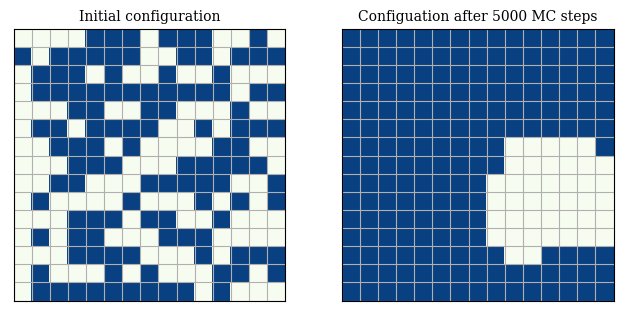

In [12]:
%matplotlib agg   
model = Ising_2D()
model.J = 1
model.n = 15
config_init = model.config
config_final = model.MC_metropolis(copy.deepcopy(config_init), 1)
fig = model.plot_config(config_init, 1, 0)
fig = model.plot_config(config_final, 2, model.N_steps, fig)
fig

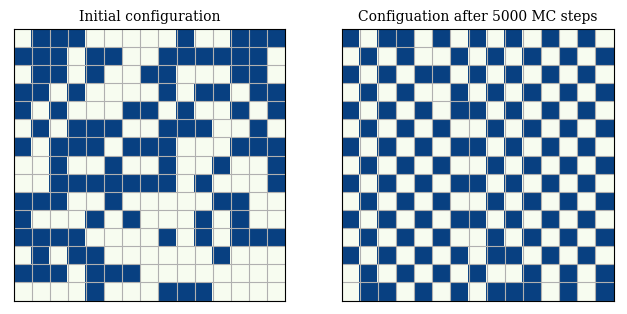

In [13]:
%matplotlib agg   
model = Ising_2D()
model.J = -1
model.n = 15
config_init = model.config
config_final = model.MC_metropolis(copy.deepcopy(config_init), 1)

fig = model.plot_config(config_init, 1, 0)

fig = model.plot_config(config_final, 2, model.N_steps, fig)
fig

#### 2. Average energy as a function of magnetization per spin

In [17]:
np.arange(0.1, 2.6, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5])

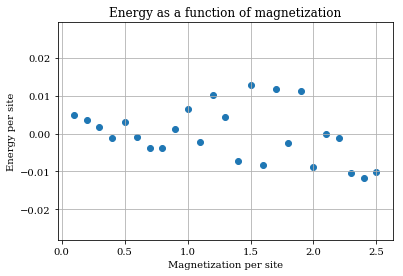

In [25]:
%matplotlib inline
h_avg, m_avg = [], []  # h = H/N, m = M/N
T = np.arange(0.1, 2.6, 0.1)

for t in T:
    model = Ising_2D()
    config_init = model.config
    config_final = model.MC_metropolis(copy.deepcopy(model.config), t)
    h_avg.append(model.h_avg)
    m_avg.append(model.m_avg)

plt.figure()
plt.scatter(T, m_avg)
plt.xlabel('Magnetization per site')
plt.ylabel('Energy per site')
plt.title('Energy as a function of magnetization')
plt.grid()

In [23]:
%matplotlib agg   
model = Ising_2D()
config_init = model.config

T = np.linspace(0.01, 3)
m = []

for i in range(len(T)):
    config = model.MC_metropolis(copy.deepcopy(config_init), T[i])
    m.append(np.mean(config))   # M/N

#### 3. Estimation of the critical temperature

[[-1 -1 -1 -1 -1]
 [-1  1 -1 -1  1]
 [-1  1  1  1 -1]
 [-1 -1 -1 -1 -1]
 [ 1 -1  1 -1  1]]


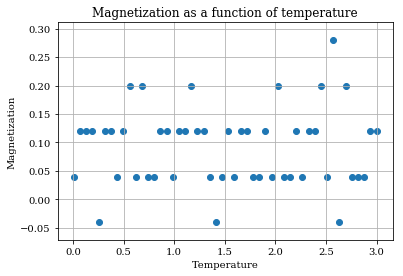

In [73]:
%matplotlib inline
model = Ising_2D()
config_init = model.config

T = np.linspace(0.01, 3)
m = []

for i in range(len(T)):
    config = model.MC_metropolis(copy.deepcopy(config_init), T[i])
    m.append(np.sum(config) / (model.n) ** 2)   # M/N
    
plt.figure()
plt.scatter(T, M)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization as a function of temperature')
plt.grid()

In [164]:
        
    
## change these parameters for a smaller (faster) simulation 
nt      = 88         #  number of temperature points
N       = 16         #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values
    
    
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT    

IndentationError: expected an indented block (<ipython-input-164-567715ad0dad>, line 24)